In [88]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
# CAS API Keys
api_key = "85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98"

#base_url = "https://api.census.gov/data/2014/acs/acs1"


In [3]:
# Importing the Data
c = Census(api_key, year=2014)
print(c)


In [4]:
census_data = c.acs5.get(("NAME"      , "COUNTY"     , "B06010_001E", "B01002_001E",
                         "B06009_001E", "B06009_002E", "B06009_003E", "B06009_004E", 
                         "B06009_005E", "B06009_006E", "B02001_001E", "B02001_002E",
                         "B02001_003E", "B02001_004E", "B02001_005E", "B02001_006E",
                         "B02001_007E", "B02001_008E", "B01001_026E", "B01001_002E",
                         "B23025_005E", "B05010_001E", "B01003_001E"),{'for': 'county:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

census_pd.head()


,B01001_002E,B01001_026E,B01002_001E,B01003_001E,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,...,B06009_003E,B06009_004E,B06009_005E,B06009_006E,B06010_001E,B23025_005E,COUNTY,NAME,county,state
0,4913688.0,5060515.0,35.3,9974203.0,9974203.0,5329333.0,832253.0,54409.0,1394349.0,26074.0,...,1347268.0,1728972.0,1281851.0,679412.0,8049317.0,564669.0,037,"Los Angeles County, California",037,06
1,73450.0,79002.0,33.3,152452.0,152452.0,125830.0,5382.0,2287.0,3335.0,254.0,...,22190.0,30369.0,8858.0,3804.0,116777.0,5530.0,039,"Madera County, California",039,06
2,125838.0,130964.0,45.1,256802.0,256802.0,203975.0,6913.0,674.0,14565.0,593.0,...,23040.0,48100.0,58107.0,45233.0,212605.0,9756.0,041,"Marin County, California",041,06
3,9050.0,8896.0,50.2,17946.0,17946.0,15850.0,155.0,598.0,232.0,74.0,...,3826.0,5251.0,2006.0,1050.0,15468.0,1132.0,043,"Mariposa County, California",043,06
4,43979.0,43633.0,42.0,87612.0,87612.0,72141.0,705.0,4169.0,1570.0,186.0,...,16137.0,22575.0,8930.0,4842.0,71774.0,5193.0,045,"Mendocino County, California",045,06


In [113]:
# Column Reordering
census_pd = census_pd.rename(columns={"NAME"        : "county_name"       ,
                                      "COUNTY"      : "county"            , 
                                      "B06010_001E" : "gross_income"      , 
                                      "B01002_001E" : "median_age"        ,
                                      "B06009_001E" : "years_of_education", 
                                      "B06009_002E" : "less_than_hs"      , 
                                      "B06009_003E" : "high_school"       , 
                                      "B06009_004E" : "some_college"      , 
                                      "B06009_005E" : "college"           , 
                                      "B06009_006E" : "grad_school"       , 
                                      "B02001_001E" : "total_race"        , 
                                      "B02001_002E" : "white"             ,
                                      "B02001_003E" : "black"             , 
                                      "B02001_004E" : "native_american"   , 
                                      "B02001_005E" : "asian"             , 
                                      "B02001_006E" : "pacific_islander"  ,
                                      "B02001_007E" : "other"             , 
                                      "B02001_008E" : "multi_racial"      , 
                                      "B01001_026E" : "female"            , 
                                      "B01001_002E" : "male"              ,
                                      "B23025_005E" : "unemployment_rate" ,
                                      "B05010_001E" : "poverty_rate"      , 
                                      "B01003_001E" : "population_size"   })


22055.141614906832

In [6]:
# Values per capita

census_pd["gross_income_pc"]       = census_pd["gross_income"] / census_pd["population_size"] 
census_pd["years_of_education_pc"] = census_pd["years_of_education"] / census_pd["population_size"] 
census_pd["less_than_hs"]          = census_pd["less_than_hs"] / census_pd["population_size"] 
census_pd["high_school_pc"]        = census_pd["high_school"] / census_pd["population_size"] 
census_pd["some_college_pc"]       = census_pd["some_college"] / census_pd["population_size"] 
census_pd["college_pc"]            = census_pd["college"] / census_pd["population_size"] 
census_pd["grad_school_pc"]        = census_pd["grad_school"] / census_pd["population_size"] 
census_pd["total_race_pc"]         = census_pd["total_race"] / census_pd["population_size"] 
census_pd["white_pc"]              = census_pd["white"] / census_pd["population_size"]
census_pd["black_pc"]              = census_pd["black"] / census_pd["population_size"]
census_pd["native_american_pc"]    = census_pd["native_american"] / census_pd["population_size"]
census_pd["asian_pc"]              = census_pd["asian"] / census_pd["population_size"]
census_pd["pacific_islander_pc"]   = census_pd["pacific_islander"]/ census_pd["population_size"]
census_pd["other_pc"]              = census_pd["other"] / census_pd["population_size"]
census_pd["multi_racial_pc"]       = census_pd["multi_racial"] / census_pd["population_size"]
census_pd["female_pc"]             = census_pd["female"] / census_pd["population_size"]
census_pd["male_pc"]               = census_pd["male"] / census_pd["population_size"]
census_pd["unemployment_rate_pc"]  = census_pd["unemployment_rate"] / census_pd["population_size"]
census_pd["poverty_rate_pc"]       = census_pd["poverty_rate"] / census_pd["population_size"]

census_pd.head()

,male,female,median_age,population_size,total_race,white,black,native_american,asian,pacific_islander,...,black_pc,native_american_pc,asian_pc,pacific_islander_pc,other_pc,multi_racial_pc,female_pc,male_pc,unemployment_rate_pc,poverty_rate_pc
0,4913688.0,5060515.0,35.3,9974203.0,9974203.0,5329333.0,832253.0,54409.0,1394349.0,26074.0,...,0.083441,0.005455,0.139796,0.002614,0.195498,0.038885,0.507360,0.492640,0.056613,0.224347
1,73450.0,79002.0,33.3,152452.0,152452.0,125830.0,5382.0,2287.0,3335.0,254.0,...,0.035303,0.015001,0.021876,0.001666,0.067261,0.033519,0.518209,0.481791,0.036274,0.267205
2,125838.0,130964.0,45.1,256802.0,256802.0,203975.0,6913.0,674.0,14565.0,593.0,...,0.026920,0.002625,0.056717,0.002309,0.076573,0.040568,0.509980,0.490020,0.037990,0.199909
3,9050.0,8896.0,50.2,17946.0,17946.0,15850.0,155.0,598.0,232.0,74.0,...,0.008637,0.033322,0.012928,0.004123,0.022233,0.035551,0.495709,0.504291,0.063078,0.159200
4,43979.0,43633.0,42.0,87612.0,87612.0,72141.0,705.0,4169.0,1570.0,186.0,...,0.008047,0.047585,0.017920,0.002123,0.063188,0.037723,0.498025,0.501975,0.059273,0.199801


In [114]:
#CoolClimate Data
climate_data_to_load = "climate_data_county_ajc.csv"
climate_pd = pd.read_csv(climate_data_to_load)
climate_pd.head()


,Population,State,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,10,AK,JUNEAU,"4,128","26,034",72,"8,074",5.9,6.1,3.8,3.1,3.5,22.3,85.0,"1,892"
1,4336,AK,YUKON KOYUKUK,"5,582","26,607",346,"10,364",7.5,5.4,8.8,4.7,5.0,31.4,1132.0,"35,513"
2,15981,AK,BETHEL,"5,938","26,562",557,"11,799",8.5,3.0,11.6,5.4,5.6,34.0,1239.0,"42,165"
3,1745,AK,LAKE AND PENINSULA,"6,092","25,539",580,"11,821",8.6,8.2,9.4,5.2,5.5,37.0,819.0,"30,276"
4,5098,AK,ALEUTIANS WEST,"5,362","23,407",502,"17,588",13.4,2.4,7.7,6.7,7.8,37.9,352.0,"13,344"


In [74]:
# Data with County and State
us_states_to_load = "us_states.csv"

us_states_df = pd.read_csv(us_states_to_load, 
                           header = None)

us_states_df.columns = ["Upper Full Name", 
                        "Proper Full Name", 
                        "State"]
us_states_df.head()

,Upper Full Name,Proper Full Name,State
0,ALABAMA,Alabama,AL
1,ALASKA,Alaska,AK
2,ARIZONA,Arizona,AZ
3,ARKANSAS,Arkansas,AR
4,CALIFORNIA,California,CA


In [75]:
# Merge both dataframes
states_complete = pd.merge(us_states_df, 
                           climate_pd, 
                           how = "left", 
                           on = ["State"]) 

states_complete


,Upper Full Name,Proper Full Name,State,Population,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,ALABAMA,Alabama,AL,14387,SUMTER,"12,667","28,415",6,"18,175",11.9,13.9,7.7,3.7,3.8,41.0,6654.0,"272,685"
1,ALABAMA,Alabama,AL,13563,WILCOX,"12,846","26,873",10,"18,756",12.2,14.1,8.2,3.7,3.7,41.8,6293.0,"262,872"
2,ALABAMA,Alabama,AL,22987,MACON,"12,983","34,664",1,"18,269",12.1,14.6,7.3,3.9,4.0,41.9,10104.0,"422,969"
3,ALABAMA,Alabama,AL,9809,GREENE,"13,157","29,872",4,"18,821",12.4,14.4,7.5,3.7,3.9,41.9,5029.0,"210,619"
4,ALABAMA,Alabama,AL,12701,BULLOCK,"12,493","28,330",1,"19,187",12.6,13.8,7.7,3.9,4.0,41.9,5166.0,"216,678"
5,ALABAMA,Alabama,AL,9830,PERRY,"13,880","32,364",3,"18,226",11.9,15.1,8.0,3.7,3.8,42.5,4266.0,"181,153"
6,ALABAMA,Alabama,AL,30485,PIKE,"11,983","27,026",3,"21,059",14.0,13.3,7.2,4.1,4.3,42.8,14435.0,"618,425"
7,ALABAMA,Alabama,AL,27630,BARBOUR,"12,508","27,275",1,"20,836",13.8,13.8,7.6,4.1,4.3,43.5,11744.0,"511,117"
8,ALABAMA,Alabama,AL,48892,RUSSELL,"12,328","28,993",2,"20,674",13.8,13.7,7.5,4.3,4.6,43.9,26673.0,"1,171,923"
9,ALABAMA,Alabama,AL,13892,CONECUH,"13,814","28,256",1,"21,171",13.9,14.8,7.3,3.9,4.1,44.0,7000.0,"307,713"


In [76]:
# Getting variables in the correct format
states_complete["County"] = states_complete["County"].str.title()
states_complete.head()

,Upper Full Name,Proper Full Name,State,Population,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,ALABAMA,Alabama,AL,14387,Sumter,"12,667","28,415",6,"18,175",11.9,13.9,7.7,3.7,3.8,41.0,6654.0,"272,685"
1,ALABAMA,Alabama,AL,13563,Wilcox,"12,846","26,873",10,"18,756",12.2,14.1,8.2,3.7,3.7,41.8,6293.0,"262,872"
2,ALABAMA,Alabama,AL,22987,Macon,"12,983","34,664",1,"18,269",12.1,14.6,7.3,3.9,4.0,41.9,10104.0,"422,969"
3,ALABAMA,Alabama,AL,9809,Greene,"13,157","29,872",4,"18,821",12.4,14.4,7.5,3.7,3.9,41.9,5029.0,"210,619"
4,ALABAMA,Alabama,AL,12701,Bullock,"12,493","28,330",1,"19,187",12.6,13.8,7.7,3.9,4.0,41.9,5166.0,"216,678"


In [77]:
# Creating the keys to merge the data sets
states_complete["county_name"] = states_complete["County"] + "County, " + states_complete["Proper Full Name"]
states_complete.head()


,Upper Full Name,Proper Full Name,State,Population,County,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),Households,Total County Carbon Footprint (tCO2e/yr),county_name
0,ALABAMA,Alabama,AL,14387,Sumter,"12,667","28,415",6,"18,175",11.9,13.9,7.7,3.7,3.8,41.0,6654.0,"272,685","Sumter County, Alabama"
1,ALABAMA,Alabama,AL,13563,Wilcox,"12,846","26,873",10,"18,756",12.2,14.1,8.2,3.7,3.7,41.8,6293.0,"262,872","Wilcox County, Alabama"
2,ALABAMA,Alabama,AL,22987,Macon,"12,983","34,664",1,"18,269",12.1,14.6,7.3,3.9,4.0,41.9,10104.0,"422,969","Macon County, Alabama"
3,ALABAMA,Alabama,AL,9809,Greene,"13,157","29,872",4,"18,821",12.4,14.4,7.5,3.7,3.9,41.9,5029.0,"210,619","Greene County, Alabama"
4,ALABAMA,Alabama,AL,12701,Bullock,"12,493","28,330",1,"19,187",12.6,13.8,7.7,3.9,4.0,41.9,5166.0,"216,678","Bullock County, Alabama"


In [84]:
# Renaming some variables
states_complete = states_complete.rename(columns={"Upper Full Name"                              : "upper_state"       ,
                                                  "Proper Full Name"                             : "title_state"       ,
                                                  "State"                                        : "state_abbrev"      ,
                                                  "Population"                                   : "population"        ,
                                                  "County"                                       : "county"            ,
                                                  "electricity (kWh)"                            : "electricity"       ,
                                                  "Nat. Gas (cu.ft.)"                            : "natural_gas"       ,
                                                  "FUELOIL (gallons)"                            : "fuel_oil"          ,
                                                  "Vehicle miles traveled"                       : "vehicle_miles"     ,
                                                  " Transport (tCO2e/yr) "                       : "transport_fp"      ,
                                                  " Housing (tCO2e/yr) "                         : "housing_fp"        ,
                                                  " Food (tCO2e/yr) "                            : "food_fp"           ,
                                                  " Goods (tCO2e/yr) "                           : "goods_fp"          ,
                                                  " Services (tCO2e/yr) "                        : "services_fp"       ,
                                                  " Total Household Carbon Footprint (tCO2e/yr) ": "household_total_fp",
                                                  " Households "                                 : "household_count"   ,
                                                  " Total County Carbon Footprint (tCO2e/yr) "   : "county_total_fp"}  )
states_complete.head()

,upper_state,title_state,state_abbrev,population,county,electricity,natural_gas,fuel_oil,vehicle_miles,transport_fp,housing_fp,food_fp,goods_fp,services_fp,household_total_fp,household_count,county_total_fp,county_name
0,ALABAMA,Alabama,AL,14387,Sumter,"12,667","28,415",6,"18,175",11.9,13.9,7.7,3.7,3.8,41.0,6654.0,"272,685","Sumter County, Alabama"
1,ALABAMA,Alabama,AL,13563,Wilcox,"12,846","26,873",10,"18,756",12.2,14.1,8.2,3.7,3.7,41.8,6293.0,"262,872","Wilcox County, Alabama"
2,ALABAMA,Alabama,AL,22987,Macon,"12,983","34,664",1,"18,269",12.1,14.6,7.3,3.9,4.0,41.9,10104.0,"422,969","Macon County, Alabama"
3,ALABAMA,Alabama,AL,9809,Greene,"13,157","29,872",4,"18,821",12.4,14.4,7.5,3.7,3.9,41.9,5029.0,"210,619","Greene County, Alabama"
4,ALABAMA,Alabama,AL,12701,Bullock,"12,493","28,330",1,"19,187",12.6,13.8,7.7,3.9,4.0,41.9,5166.0,"216,678","Bullock County, Alabama"


In [85]:
climate_census = pd.merge(census_pd,
                          states_complete,
                          how = "inner",
                          on = "county_name")
climate_census.columns

Index(['male', 'female', 'median_age', 'population_size', 'total_race',
       'white', 'black', 'native_american', 'asian', 'pacific_islander',
       'other', 'multi_racial', 'poverty_rate', 'years_of_education',
       'less_than_hs', 'high_school', 'some_college', 'college', 'grad_school',
       'gross_income', 'unemployment_rate', 'county_x', 'county_name',
       'county_x', 'state', 'gross_income_pc', 'years_of_education_pc',
       'high_school_pc', 'some_college_pc', 'college_pc', 'grad_school_pc',
       'total_race_pc', 'white_pc', 'black_pc', 'native_american_pc',
       'asian_pc', 'pacific_islander_pc', 'other_pc', 'multi_racial_pc',
       'female_pc', 'male_pc', 'unemployment_rate_pc', 'poverty_rate_pc',
       'upper_state', 'title_state', 'state_abbrev', 'population', 'county_y',
       'electricity', 'natural_gas', 'fuel_oil', 'vehicle_miles',
       'transport_fp', 'housing_fp', 'food_fp', 'goods_fp', 'services_fp',
       'household_total_fp', 'household_count', '

In [86]:
climate_census["pop_household"] = climate_census["population_size"] / climate_census["household_count"]  
climate_census

,male,female,median_age,population_size,total_race,white,black,native_american,asian,pacific_islander,...,vehicle_miles,transport_fp,housing_fp,food_fp,goods_fp,services_fp,household_total_fp,household_count,county_total_fp,pop_household
0,4913688.0,5060515.0,35.3,9974203.0,9974203.0,5329333.0,832253.0,54409.0,1394349.0,26074.0,...,"20,684",14.3,7.4,9.5,5.5,6.0,42.7,3267476.0,"139,626,359",3.052571
1,73450.0,79002.0,33.3,152452.0,152452.0,125830.0,5382.0,2287.0,3335.0,254.0,...,"25,857",17.1,8.1,9.8,5.0,5.3,45.4,40074.0,"1,817,869",3.804262
2,125838.0,130964.0,45.1,256802.0,256802.0,203975.0,6913.0,674.0,14565.0,593.0,...,"25,415",18.6,9.6,7.1,7.1,8.4,50.8,104695.0,"5,313,560",2.452858
3,9050.0,8896.0,50.2,17946.0,17946.0,15850.0,155.0,598.0,232.0,74.0,...,"24,737",16.7,6.8,7.1,4.7,5.2,40.4,8431.0,"340,582",2.128573
4,43979.0,43633.0,42.0,87612.0,87612.0,72141.0,705.0,4169.0,1570.0,186.0,...,"23,821",16.1,7.6,7.6,4.8,5.2,41.3,37076.0,"1,531,147",2.363038
5,131899.0,129710.0,30.2,261609.0,261609.0,168794.0,9115.0,2024.0,19842.0,572.0,...,"24,111",16.0,8.3,9.9,5.0,5.2,44.4,68307.0,"3,029,862",3.829900
6,4727.0,4608.0,47.1,9335.0,9335.0,8396.0,108.0,236.0,52.0,0.0,...,"22,938",15.3,9.0,7.0,4.2,4.6,40.2,4231.0,"169,888",2.206334
7,7520.0,6673.0,37.2,14193.0,14193.0,11993.0,63.0,380.0,116.0,132.0,...,"17,334",12.4,6.8,7.3,5.3,5.9,37.8,11236.0,"424,653",1.263172
8,218060.0,206867.0,33.3,424927.0,424927.0,319839.0,11826.0,4161.0,26497.0,2183.0,...,"24,316",16.6,7.6,10.1,5.8,6.3,46.4,129027.0,"5,990,811",3.293318
9,69301.0,69952.0,40.3,139253.0,139253.0,107543.0,2992.0,696.0,10362.0,356.0,...,"25,628",17.9,8.1,7.8,5.9,6.7,46.3,45460.0,"2,106,150",3.063198


In [83]:
variables_to_clean = ['electricity'  , 'natural_gas', 'fuel_oil'       , 
                      'vehicle_miles', 'housing_fp' , 'county_total_fp']

for variable in variables_to_clean:
    climate_census[variable] = climate_census[variable].str.replace(' ', '')
    climate_census[variable] = climate_census[variable].str.replace('-', '')
    climate_census[variable] = climate_census[variable].str.replace(',', '')

    

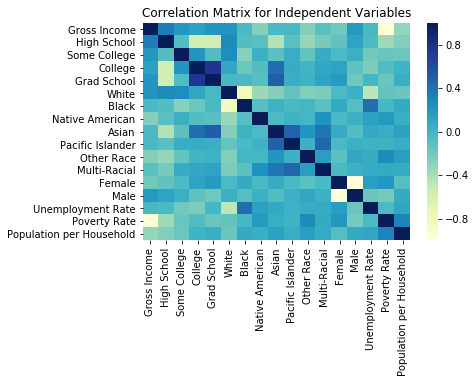

In [105]:
# Correlation Matrix

independent_variables = ['gross_income_pc', 'high_school_pc'     ,  'some_college_pc'     , 'college_pc'        , 
                         'grad_school_pc' , 'white_pc'           ,  'black_pc'            , 'native_american_pc', 
                         'asian_pc'       , 'pacific_islander_pc',  'other_pc'            , 'multi_racial_pc'   ,
                         'female_pc'      , 'male_pc'            ,  'unemployment_rate_pc', 'poverty_rate_pc'   , 
                         'pop_household']

labels = ['Gross Income', 'High School'     , 'Some College'     , 'College'        , 
          'Grad School' , 'White'           , 'Black'            , 'Native American', 
          'Asian'       , 'Pacific Islander', 'Other Race'       , 'Multi-Racial'   ,
          'Female'      , 'Male'            , 'Unemployment Rate', 'Poverty Rate'   , 
          'Population per Household']

data_for_correlation = climate_census[independent_variables]


correlation = plt.axes()
sns.heatmap(data_for_correlation.corr(), 
            cmap = "YlGnBu", 
            yticklabels = labels,
            xticklabels = labels)
correlation.set_title('Correlation Matrix for Independent Variables')
plt.show()


In [122]:
#Regression with robustcov
# Regressions on transportation
lm_transport = smf.ols(formula = 'transport_fp ~ high_school_pc + some_college_pc + college_pc + grad_school_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + unemployment_rate_pc + poverty_rate_pc + pop_household', 
                       data = climate_census).fit().get_robustcov_results()
#print(lm_transport.params) 
lm_transport_summary = lm_transport.summary()

transport_poverty = lm_transport.params[len(lm_transport.params) - 2]
transport_poverty

34.13542914474031

In [123]:


#Regression
# Regressions on  housing
lm_housing = smf.ols(formula = 'housing_fp ~ gross_income_pc + high_school_pc + some_college_pc + college_pc + grad_school_pc + white_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + male_pc + unemployment_rate_pc + poverty_rate_pc',
                     data = climate_census).fit().get_robustcov_results()
#print(lm_housing.params) 
lm_housing_summary = lm_housing.summary()

housing_poverty = lm_housing.params[len(lm_housing.params) - 2]
housing_poverty



ValueError: shapes (2921,152) and (2921,152) not aligned: 152 (dim 1) != 2921 (dim 0)

In [124]:
#Regression
# Regressions on goods 
lm_goods = smf.ols(formula = 'goods_fp ~ gross_income_pc + high_school_pc + some_college_pc + college_pc + grad_school_pc + white_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + male_pc + unemployment_rate_pc + poverty_rate_pc', data = climate_census).fit().get_robustcov_results()
#print(lm_goods.params) 
lm_goods_summary = lm_goods.summary()

goods_poverty = lm_goods.params[len(lm_goods.params) - 2]
goods_poverty


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 15
  'rank is %d' % (J, J_), ValueWarning)


8.653128825959904

In [ ]:

#Regression
# Regressions on services 
lm_services = smf.ols(formula = 'services_fp ~ gross_income_pc + high_school_pc + some_college_pc + college_pc + grad_school_pc + white_pc + black_pc + native_american_pc + asian_pc + pacific_islander_pc + other_pc + multi_racial_pc + female_pc + male_pc + unemployment_rate_pc + poverty_rate_pc', data = climate_census).fit().get_robustcov_results()
#print(lm_services.params) 
lm_services_summary = lm_services.summary()

services_poverty = lm_services.params[len(lm_services.params) - 2]
services_poverty